In [174]:
import nltk

In [175]:
romeojuliet = open("Shakespeare.txt")

## Tokenization

In [176]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenizes the text into sentences
text = romeojuliet.read()
sentences = sent_tokenize(text)

In [177]:
# Tokenizes the text into words
words = []
for s in sentences:
    for w in word_tokenize(s):
        words.append(w)

## Remove Stopwords

In [178]:
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [179]:
# Creating the stopwords for the text
textsw = list(punctuation) + stopwords.words('english')

In [180]:
text_cleaned = [word for word in words if word.lower() not in textsw]

## Stemming

In [181]:
from nltk.stem.lancaster import LancasterStemmer

In [182]:
wordLancasterStems = [LancasterStemmer().stem(w) for w in text_cleaned]

## Word frequencies 

In [183]:
import collections
w_counts = collections.Counter(wordLancasterStems)

In [184]:
frequencies = w_counts.most_common()
# shows top 20 for example, the list is too long
frequencies[0:20]

[("'s", 293),
 ('thou', 278),
 ("'d", 224),
 ('lov', 171),
 ('thy', 164),
 ('rom', 163),
 ('romeo', 154),
 ('nurs', 148),
 ('the', 136),
 ('com', 127),
 ('jul', 120),
 ('shal', 112),
 ('fri', 93),
 ('ent', 92),
 ("'ll", 90),
 ('man', 85),
 ('project', 84),
 ('lady', 83),
 ('good', 83),
 ('night', 81)]

## Mean,median mode, trimmed mean, histogram, standard deviation, interquartile range

In [185]:
import pandas as pd 

In [186]:
word_freq = pd.DataFrame(frequencies,columns=["word","frequency"])

In [187]:
# The mean is about 5.36 
word_freq["frequency"].mean()

5.364794252122795

In [188]:
# The median is 2
word_freq["frequency"].median()

2.0

In [167]:
# The mode is 1
word_freq["frequency"].mode()

0    1
dtype: int64

In [168]:
word_freq2 = word_freq.sort_values(by="frequency",ignore_index=True).copy()

In [33]:
#trimmed mean
# I am not sure how the frequencies distribute, but I don't want to make any assumption,
# so I will take 96% of the data, just trimming a little bit
word_freq2.loc[int(0.02*4574):int(0.98*1005),'frequency'].mean()

1.0

<AxesSubplot:ylabel='Frequency'>

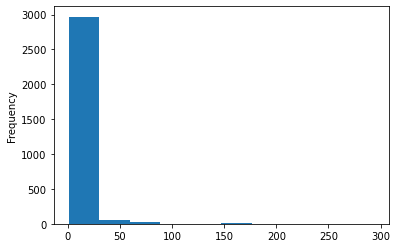

In [169]:
word_freq2["frequency"].plot.hist()
# Most of the word frequencies are 1. There are very few words that have high frequencies. 
# This histogram corresponds to the small mean of 5.46, median of 2 and mode of 1. 
# The trimmed mean includes 96% of the data, which has a lot of "1", 
# and probably took out the large outlier on the right
# so it's not surprised that the trimmed mean is closer to 1 than the actual mean. 

In [171]:
# The standard deviation is about 14.53
# This large standard deviation make sense considering the large outliers and small median & mode 

import math 
mu = word_freq["frequency"].mean()
n = len(word_freq)
sum = 0 
for i in word_freq["frequency"]:
    sum += (i - mu)*(i - mu) 
sd = math.sqrt(sum/n) 
sd

14.53390285082341

In [173]:
# The interquartile range of 3 make sense as most data have very small frequencies. 
# On the histogram, we can see that most data are clustered to the left. 
# Thus, it make sense they have a small distance between them. 
word_freq["frequency"].quantile(0.75) - word_freq["frequency"].quantile(0.25)

# The interquartile range shows the relative distance between middle 50% of the data
# while the standard deviation calculates the distance between every data point. 
# Since most data are small and clustered to the left, but there are large outliers,
# it is logical to have a huge standard deviation and small interquartile range. 

3.0

## Foray into Machine Learning 

In [49]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

## Exploratory Analysis

In [69]:
# It is hard to analyze the data from summary statistics.
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


<AxesSubplot:ylabel='Frequency'>

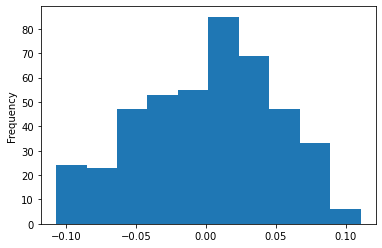

In [83]:
# From the plots of numerical columns below, 
# we can see most of the numerical values are normally distributed. 
features_df["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

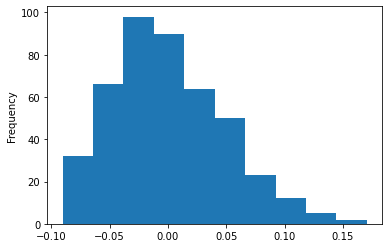

In [84]:
features_df["bmi"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

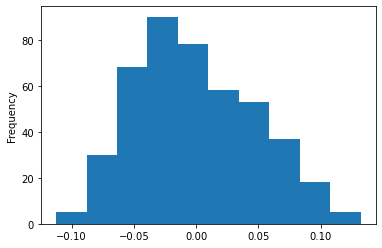

In [85]:
features_df["bp"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

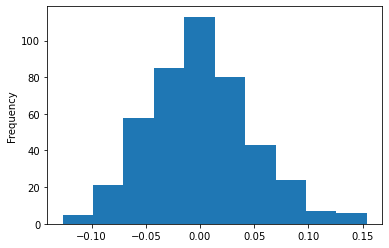

In [86]:
features_df["s1"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

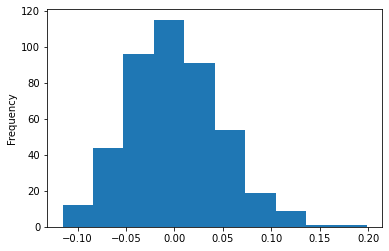

In [87]:
features_df["s2"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

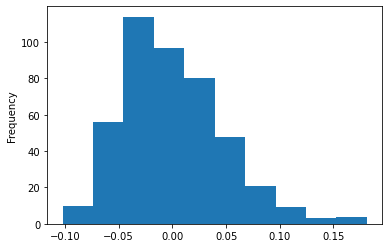

In [88]:
features_df["s3"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

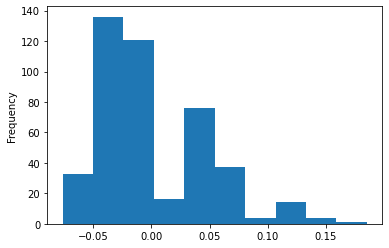

In [89]:
features_df["s4"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

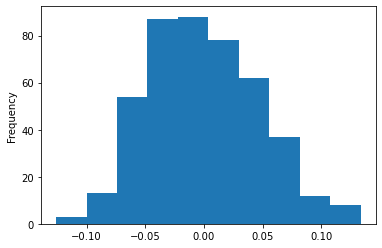

In [90]:
features_df["s5"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

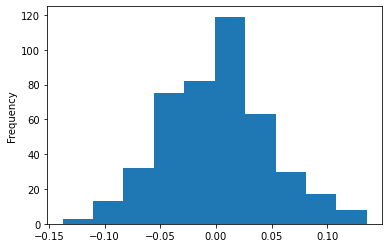

In [91]:
features_df["s6"].plot.hist()

## Highest correlation

In [120]:
# The column with highest correlation is bmi. 
col=list(features_df.columns)
new=features_df.copy()
new["target"] = list(target_df.values)
for c in col:
    print(new[[c,'target']].corr())

             age    target
age     1.000000  0.187889
target  0.187889  1.000000
             sex    target
sex     1.000000  0.043062
target  0.043062  1.000000
            bmi   target
bmi     1.00000  0.58645
target  0.58645  1.00000
              bp    target
bp      1.000000  0.441484
target  0.441484  1.000000
              s1    target
s1      1.000000  0.212022
target  0.212022  1.000000
              s2    target
s2      1.000000  0.174054
target  0.174054  1.000000
              s3    target
s3      1.000000 -0.394789
target -0.394789  1.000000
              s4    target
s4      1.000000  0.430453
target  0.430453  1.000000
              s5    target
s5      1.000000  0.565883
target  0.565883  1.000000
              s6    target
s6      1.000000  0.382483
target  0.382483  1.000000


# target values vs this bmi column's values 

<AxesSubplot:xlabel='bmi', ylabel='target'>

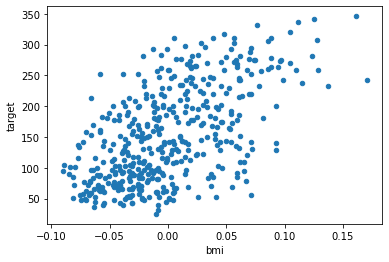

In [121]:
# We can see a highly linear pattern, thus the high correlation makes sense. 
new.plot.scatter(y='target',x='bmi')

## Linear regression

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
x = np.array(new['bmi'])
y = np.array(new['target'])
reg = LinearRegression().fit(x.reshape(-1, 1), y)

## coefficient of the model

In [142]:
reg.coef_

array([949.43526038])

## Plot the linear fit on top of the scatter plot

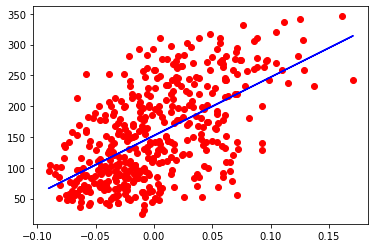

In [146]:
y2 = reg.intercept_ + reg.coef_ * X
plt.plot(x,y,'ro',x,y2,'b-')

## Output the mean squared error and R-squared values for your fit

In [150]:
mean_squared_error(y, y2)

3890.4565854612724

In [151]:
r2_score(y, y2)

0.3439237602253803

## Linear Regression with s1 

In [153]:
x = np.array(new['s1'])
y = np.array(new['target'])
reg = LinearRegression().fit(x.reshape(-1, 1), y)
y2 = reg.intercept_ + reg.coef_ * X

In [154]:
mean_squared_error(y, y2)

4721.803129777341

In [156]:
r2_score(y, y2)
# The mean square error increased while r2 decreases. 
# This is the logical result as 's1' column is less correlated with target values.
# Thus, it would have larger error and smaller accuracy between predicted and actual y values.
# In other worlds, column 'bmi' is a better predictor than 'r2.'

0.20372769254972922